In [1]:
import pandas as pd

In [4]:
file_path = 'USA_Housing.csv'
data = pd.read_csv(file_path)

data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [9]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
          'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [12]:
pickle_file_path = 'linear_model.pkl'
with open(pickle_file_path, 'wb') as file:
    pickle.dump(linear_model, file)

pickle_file_path

'linear_model.pkl'

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

coefficients = linear_model.coef_
intercept = linear_model.intercept_

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

model_results = {
    "Coefficients": dict(zip(X.columns, coefficients)),
    "Intercept": intercept,
    "Mean Squared Error": mse,
    "R-squared Score": r2
}

model_results

{'Coefficients': {'Avg. Area Income': np.float64(21.65220576362337),
  'Avg. Area House Age': np.float64(164666.48072189197),
  'Avg. Area Number of Rooms': np.float64(119624.0122320578),
  'Avg. Area Number of Bedrooms': np.float64(2440.3776110316717),
  'Area Population': np.float64(15.270313429966336)},
 'Intercept': np.float64(-2635072.900933357),
 'Mean Squared Error': 10089009300.894522,
 'R-squared Score': 0.9179971706834288}

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

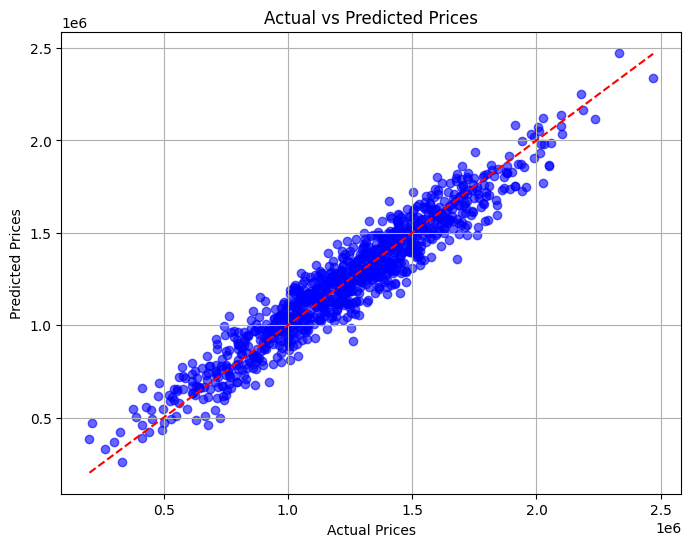

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()

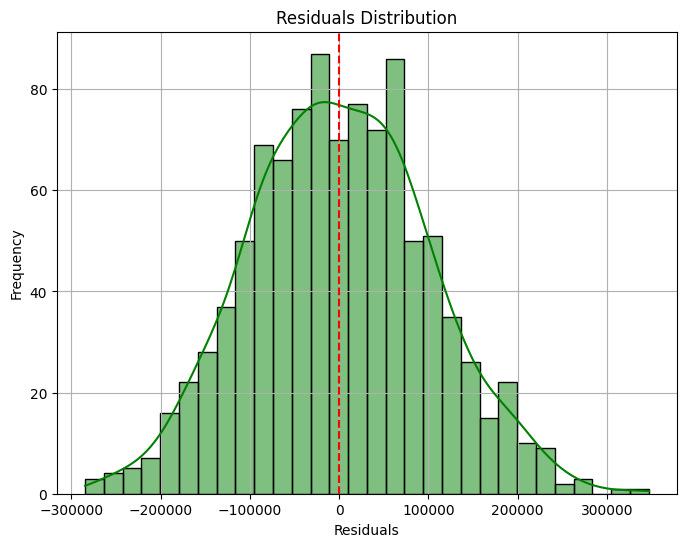

In [21]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="green", bins=30)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12112\1862495861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients, y=features, palette="viridis")


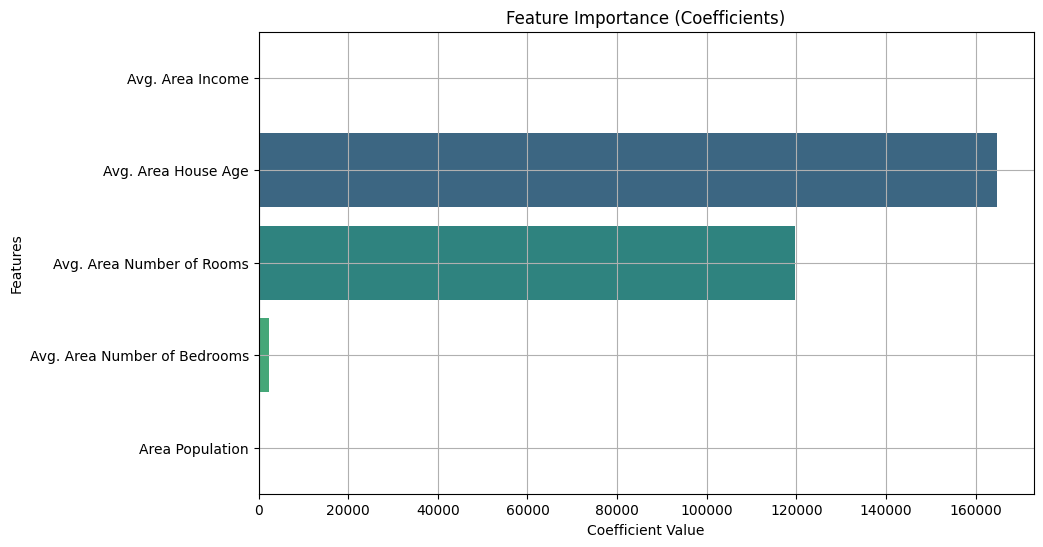

In [22]:
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=features, palette="viridis")
plt.title("Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.grid(True)
plt.show()